In [2]:
library(ggplot2)
library(gridExtra)
library(scales)
library(comprehenr)

## Exercise 1

In [6]:
x  <- c(15.58, 15.90, 16.00, 16.10, 16.20)
p1 <- c(0.15,  0.21,  0.35,  0.15,  0.14)
p2 <- c(0.14,  0.05,  0.64,  0.08,  0.09)

# evaluate expected values and variance for p1 and p2
mu1 <- sum(x*p1)
mu2 <- sum(x*p2)

std1 <- sum(x^2*p1)-mu1^2
std2 <- sum((x-mu2)^2*p2)

cat("Method 1:\n\tE[X]   =", mu1,"\n\tVar(X) =", std1, "\nMethod 2:\n\tE[X]   =", mu2, "\n\tVar(X) =", std2)

Method 1:
	E[X]   = 15.959 
	Var(X) = 0.033979 
Method 2:
	E[X]   = 15.9622 
	Var(X) = 0.02816716

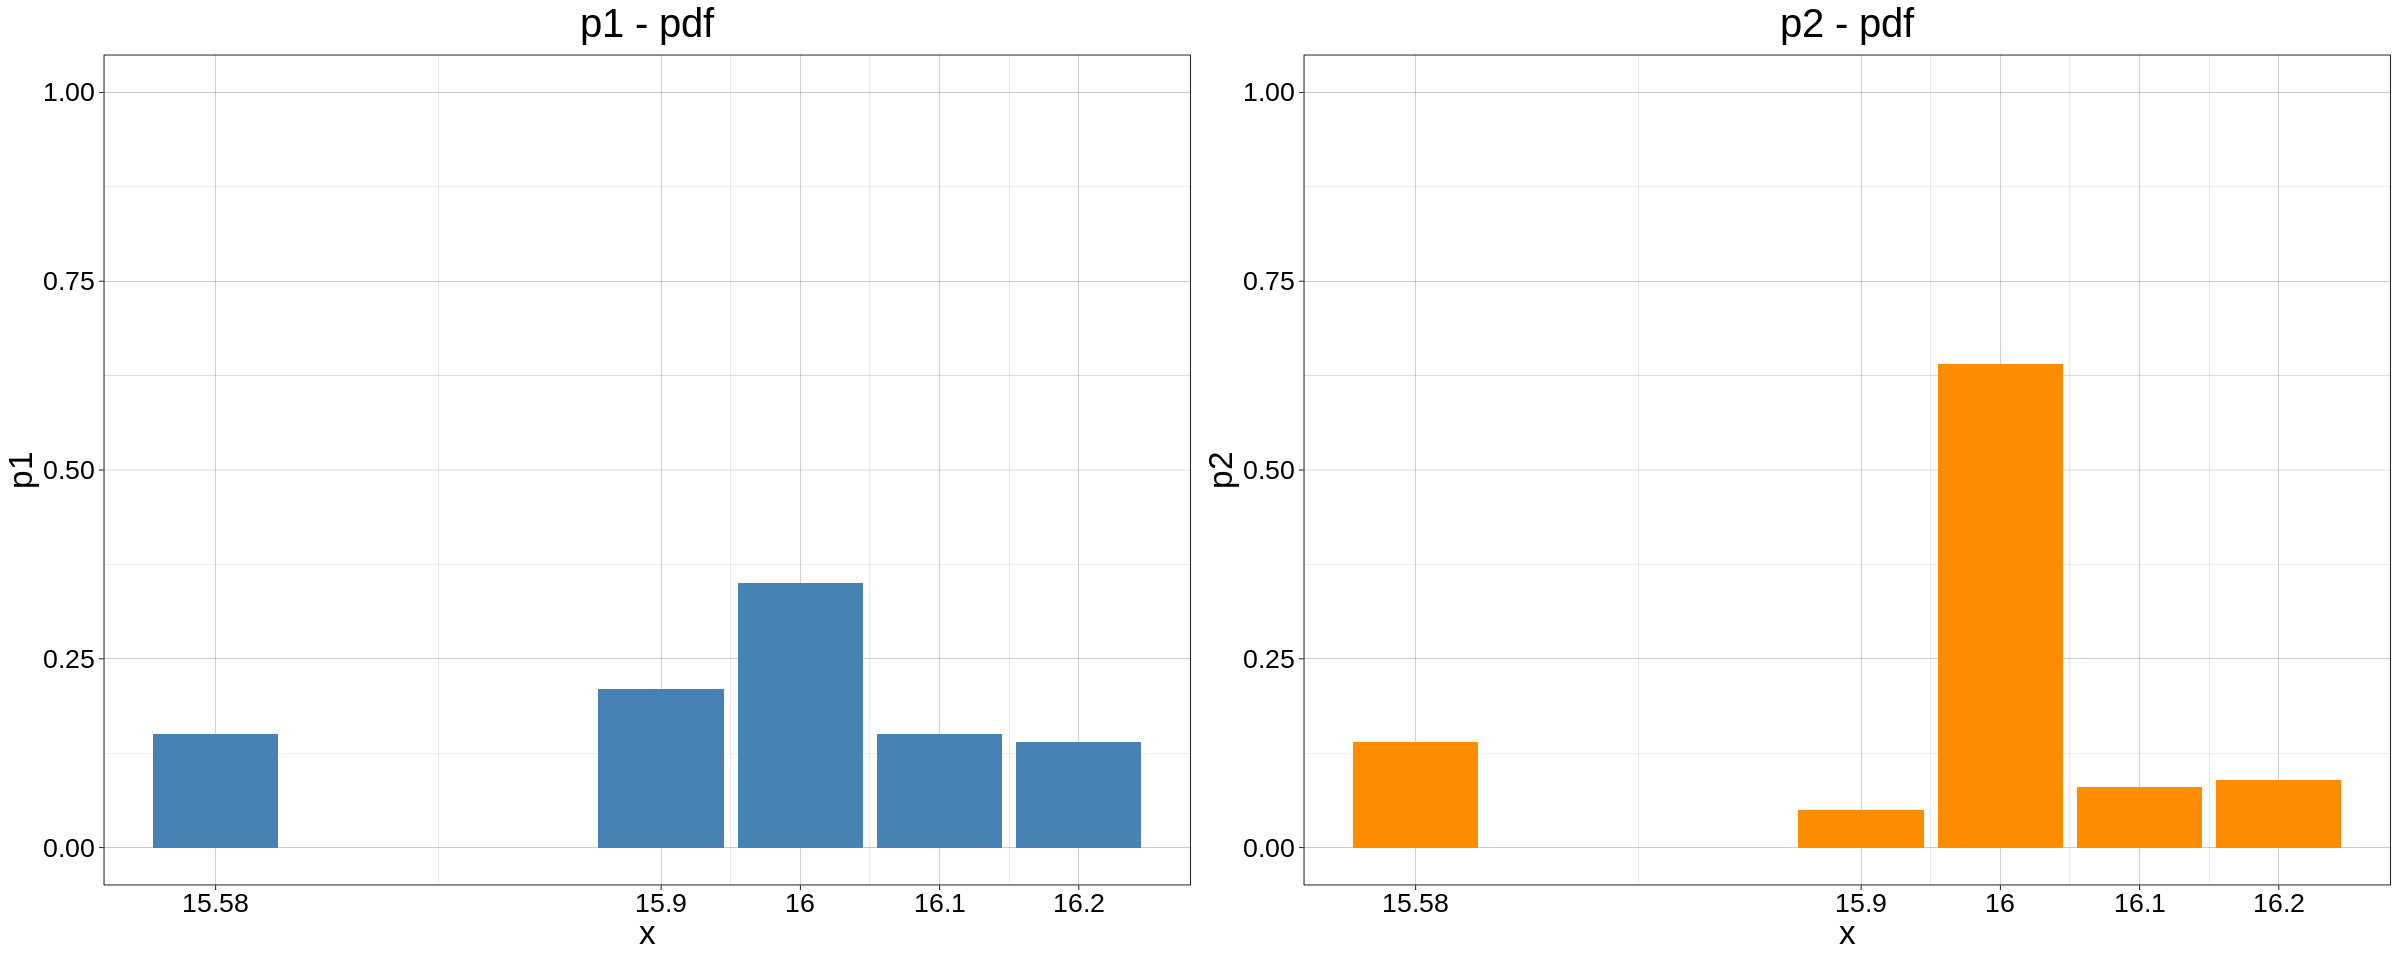

In [8]:
# plot the two distributions

options(repr.plot.width=20, repr.plot.height=8)                                   
p1_pdf <- ggplot() +   
     theme_linedraw() +                                            
     geom_bar(aes(x=x, y=p1), fill="steelblue", stat="identity") +                                                             
     theme(text = element_text(size=20)) +
     ggtitle("p1 - pdf") +
     theme(plot.title = element_text(hjust = 0.5))  +
     ylim(0,1)  +
     scale_x_continuous(breaks=x, labels=x) 

p2_pdf<- ggplot() +   
     theme_linedraw() +                                            
     geom_bar(aes(x=x, y=p2), fill="dark orange", stat="identity") +                                                             
     theme(text = element_text(size=20)) +
     ggtitle("p2 - pdf") +
     theme(plot.title = element_text(hjust = 0.5)) +
     ylim(0,1) +
     scale_x_continuous(breaks=x, labels=x) 

grid.arrange(p1_pdf, p2_pdf, nrow=1)


## Exercise 2
The waiting time, in minutes, at the doctor’s is about 30 minutes, and the distribution follows an exponential pdf with rate 1/30, compute:

- simulate the waiting time for 50 people at the doctor’s office and plot the relative
histogram
- what is the probability that a person will wait for less than 10 minutes ?
- evaluate the average waiting time from the simulated data and compare it with
the expected value (calculated from theory and by manipulating the probability
distributions using R)
- what is the probability for waiting more than one hour before being received ?


-> _Solution_

Take minutes as time unit, the poisson discrete distribution is $\frac{\lambda^r}{r!} e^{-\lambda}$, we can sample from this distribution with the R function `rexp(N, lambda)`

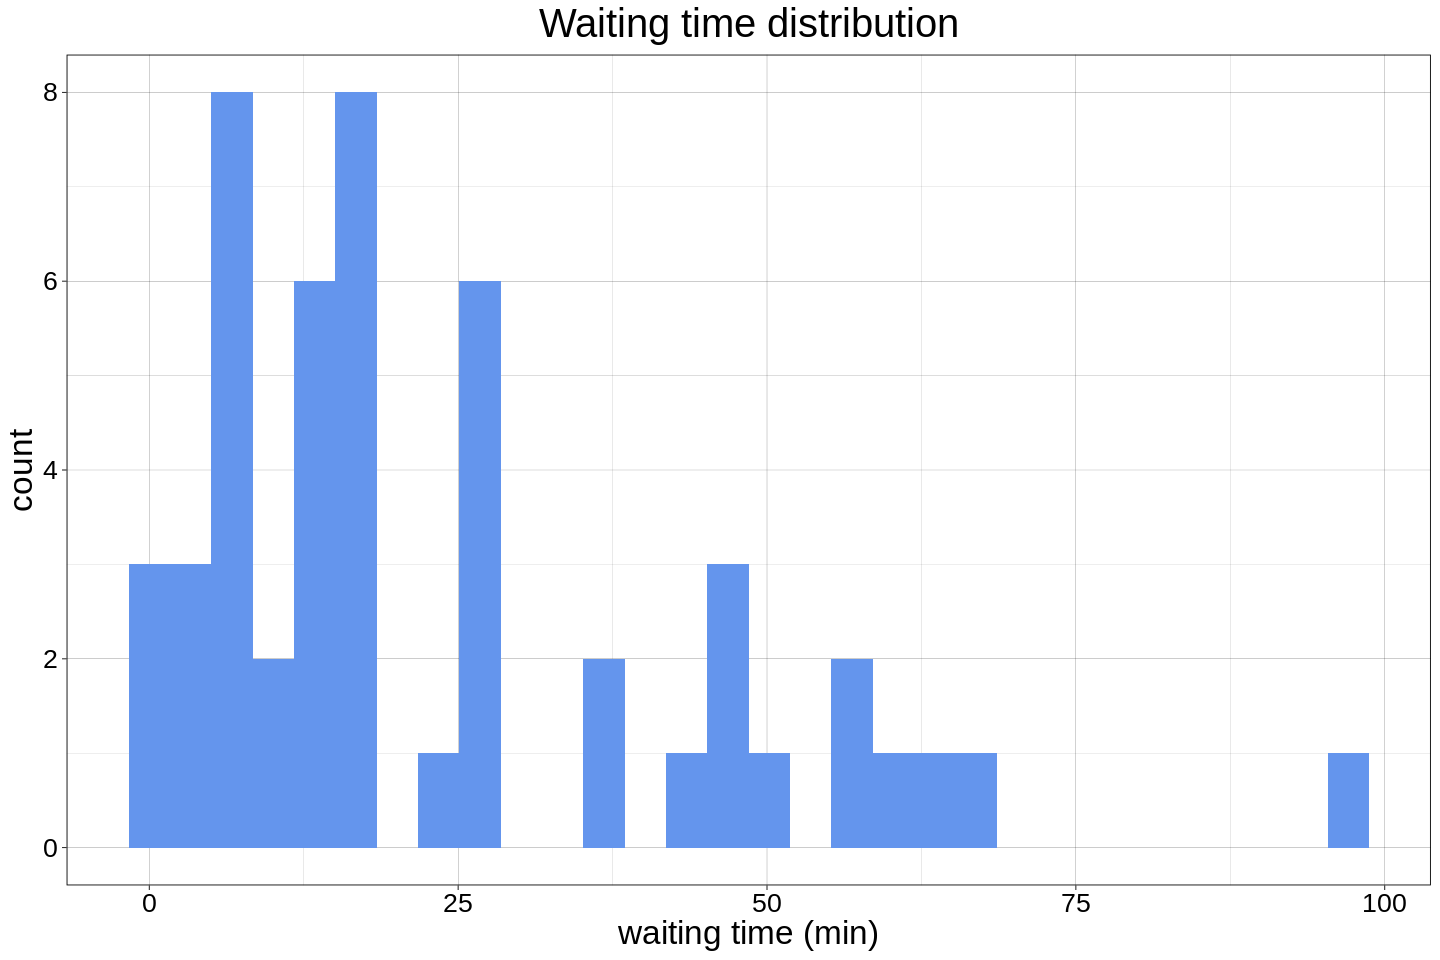

In [128]:
# simulate the waiting time for 50 people at the doctor’s office and plot the relative histogram

lambda         <- 1/30
N              <- 50
simulated_data <- rexp(N, lambda)

options(repr.plot.width=12, repr.plot.height=8)                                   
exp_hist <- ggplot() +   
     theme_linedraw() +                                            
     geom_histogram(aes(simulated_data), fill="cornflowerblue", bins = 30) +                                                             
     theme(text = element_text(size=20)) +
     ggtitle("Waiting time distribution") +
     theme(plot.title = element_text(hjust = 0.5)) +
     #scale_y_continuous(limits=c(0,15)) +
     xlab("waiting time (min)")

exp_hist

In [129]:
# what is the probability that a person will wait for less than 10 minutes ?

p_less_10 = pexp(10, lambda)
cat("The probability that a person will wait for less than 10 min is", (p_less_10)*100, "%")

The probability that a person will wait for less than 10 min is 28.34687 %

In [130]:
# evaluate the average waiting time from the simulated data and compare it with the expected value (calculated from theory and by manipulating the probability
# distributions using R)

simulated_average    <- mean(simulated_data)
expected_value_th    <- 1/lambda
expected_value_R     <- integrate(function(x){x*dexp(x, rate=lambda)}, 0, Inf)$value

cat("Average from simulated data : ", simulated_average, "\n")
cat("Theoretical expected value  : ", expected_value_th, "\n")
cat("Expected value using R      : ", expected_value_R, "\n")

Average from simulated data :  23.74475 
Theoretical expected value  :  30 
Expected value using R      :  30 


In [131]:
# what is the probability for waiting more than one hour before being received ?
p_more_1h = 1-pexp(60, lambda)
cat("The probability for waiting more than one hour before being received is", (p_more_1h)*100, "%")

The probability for waiting more than one hour before being received is 13.53353 %

## Exercise 3
Let’s suppose that on a book, on average, there is one typo error every three pages.
If the number of errors follows a Poisson distribution, plot the pdf and cdf, and
calculate the probability that there is at least one error on a specific page of the
book

-> _Solution_

Set a rate of 1/3 for a Poisson distribution with _time unit_ 1 page.

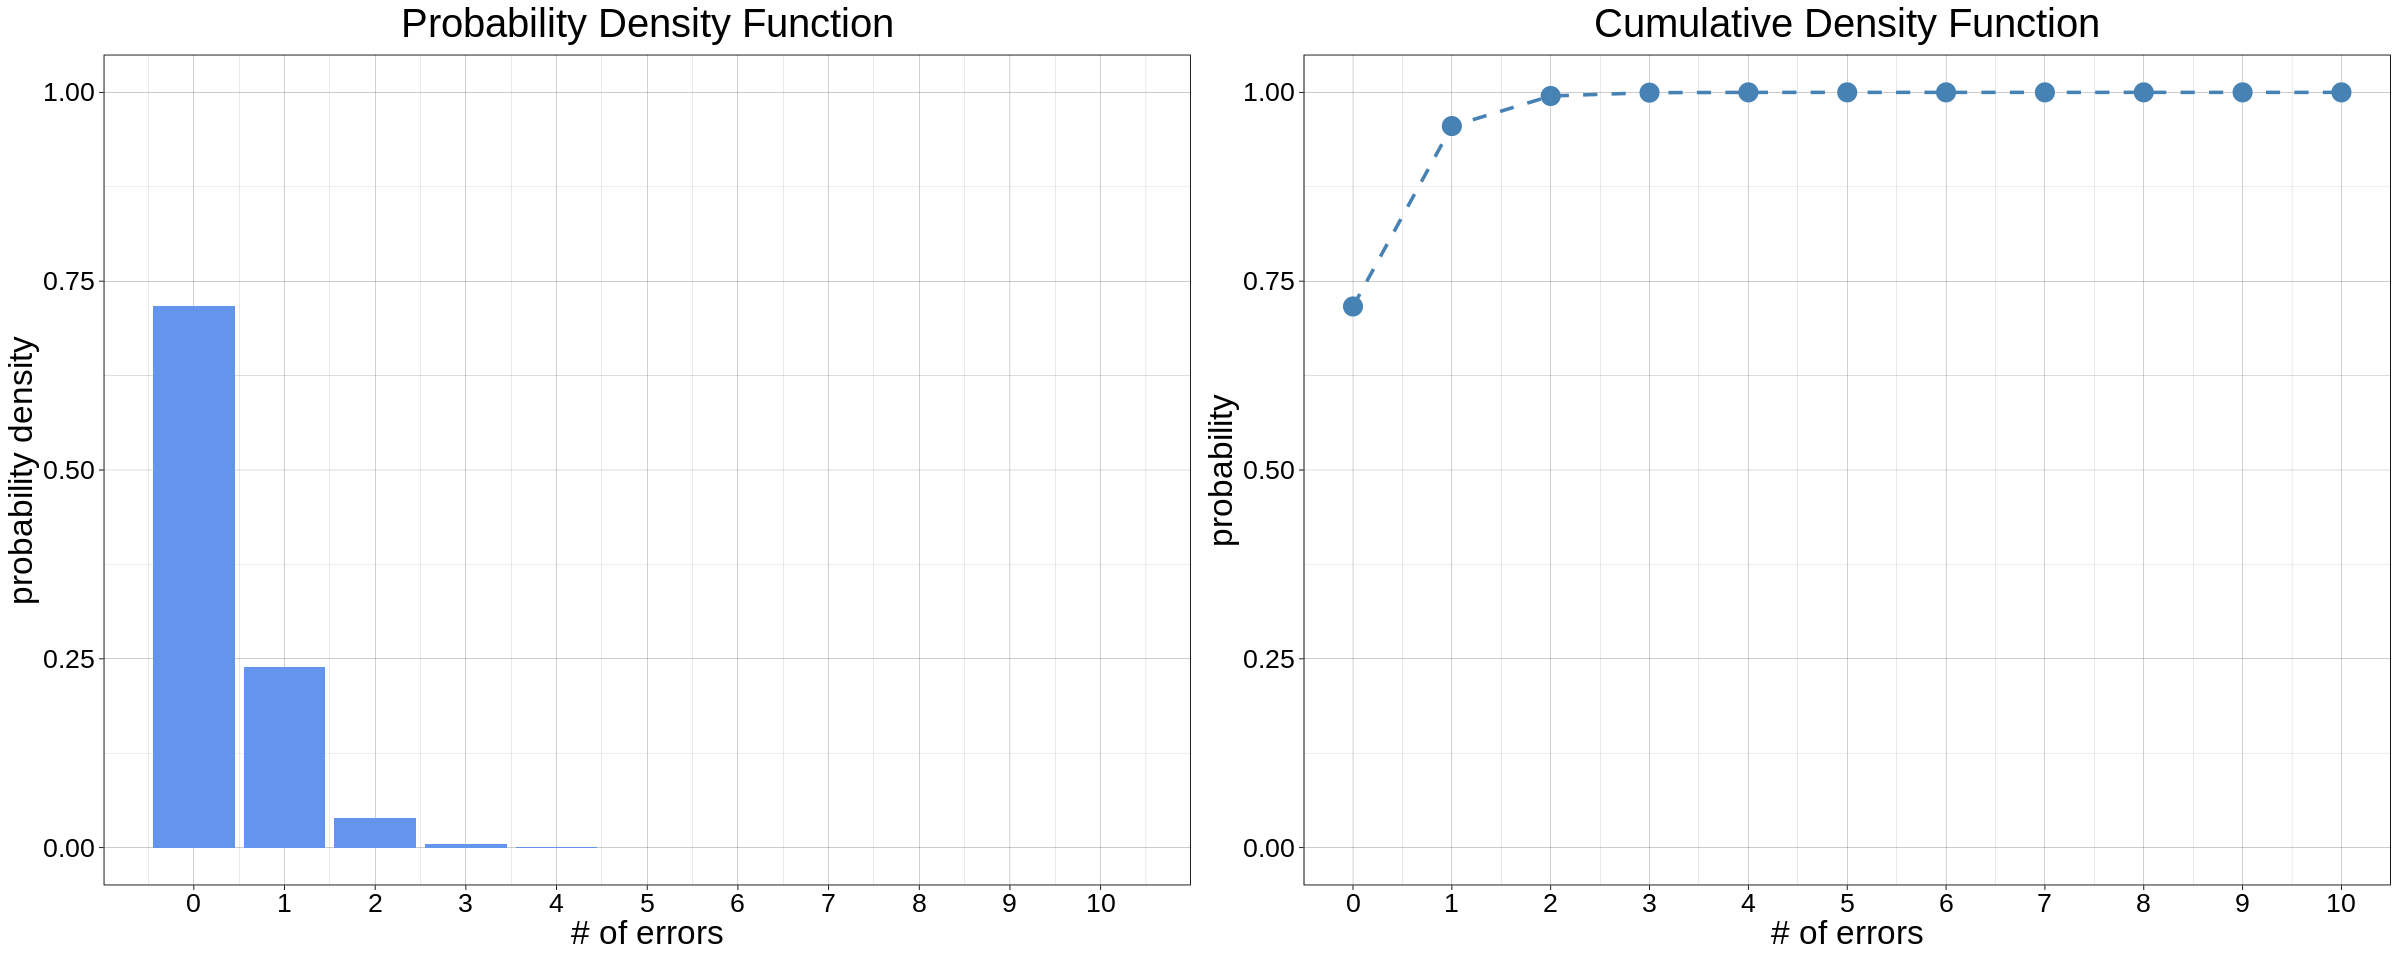

In [69]:
# plot the pdf and cdf
lambda = 1/3
x = 0:10
y_pdf = dpois(x, lambda)
y_cdf = ppois(x, lambda)
options(repr.plot.width=20, repr.plot.height=8)                                   
pdf <- ggplot() +   
     theme_linedraw() +                                            
     geom_bar(aes(x=x, y=y_pdf), fill="cornflowerblue", stat="identity") +                                                             
     theme(text = element_text(size=20)) +
     ggtitle("Probability Density Function") +
     theme(plot.title = element_text(hjust = 0.5))  +
     ylim(0,1) +
     ylab("probability density") +
     xlab("# of errors") +   

     scale_x_continuous(breaks=x, labels=x) 

cdf <- ggplot() +   
     theme_linedraw() +                                            
     geom_line(aes(x=x, y=y_cdf), color="steelblue", lwd = 1, linetype="dashed") + 
     geom_point(aes(x=x, y=y_cdf), color="steelblue", size = 5) +                                                              
     theme(text = element_text(size=20)) +
     ggtitle("Cumulative Density Function") +
     theme(plot.title = element_text(hjust = 0.5))  +
     ylab("probability") +
     ylim(0,1) +
     xlab("# of errors") +
     scale_x_continuous(breaks=x, labels=x) 

grid.arrange(pdf, cdf, nrow=1)

Compute $P(x\ge 1)$ as $1-P(x=0)$

In [12]:
# calculate the probability that there is at least one error on a specific page of the book
cat("The probability that there is at least one error on a specific page of the book is", round(1-ppois(0, lambda=1/3), 4)*100, "%")

The probability that there is at least one error on a specific page of the book is 28.35 %

## Exercise 4
We randomly draw cards from a deck of 52 cards, with replacement, until one ace is drawn. Calculate the probability that at least 10 draws are needed.

-> _Solution_

We are dealing with a negative binomial distribution. The probability of drawing an ace is $ p = \frac{\text{\# of aces}}{\text{\# of cards}} = \frac{4}{52} $. The probability that at least 10 draws are needed is equal to the probability to draw an ace after at least nine failures, so we are looking to the probability of having the first success at the $n^{th}$ trial and we want $n\ge10$

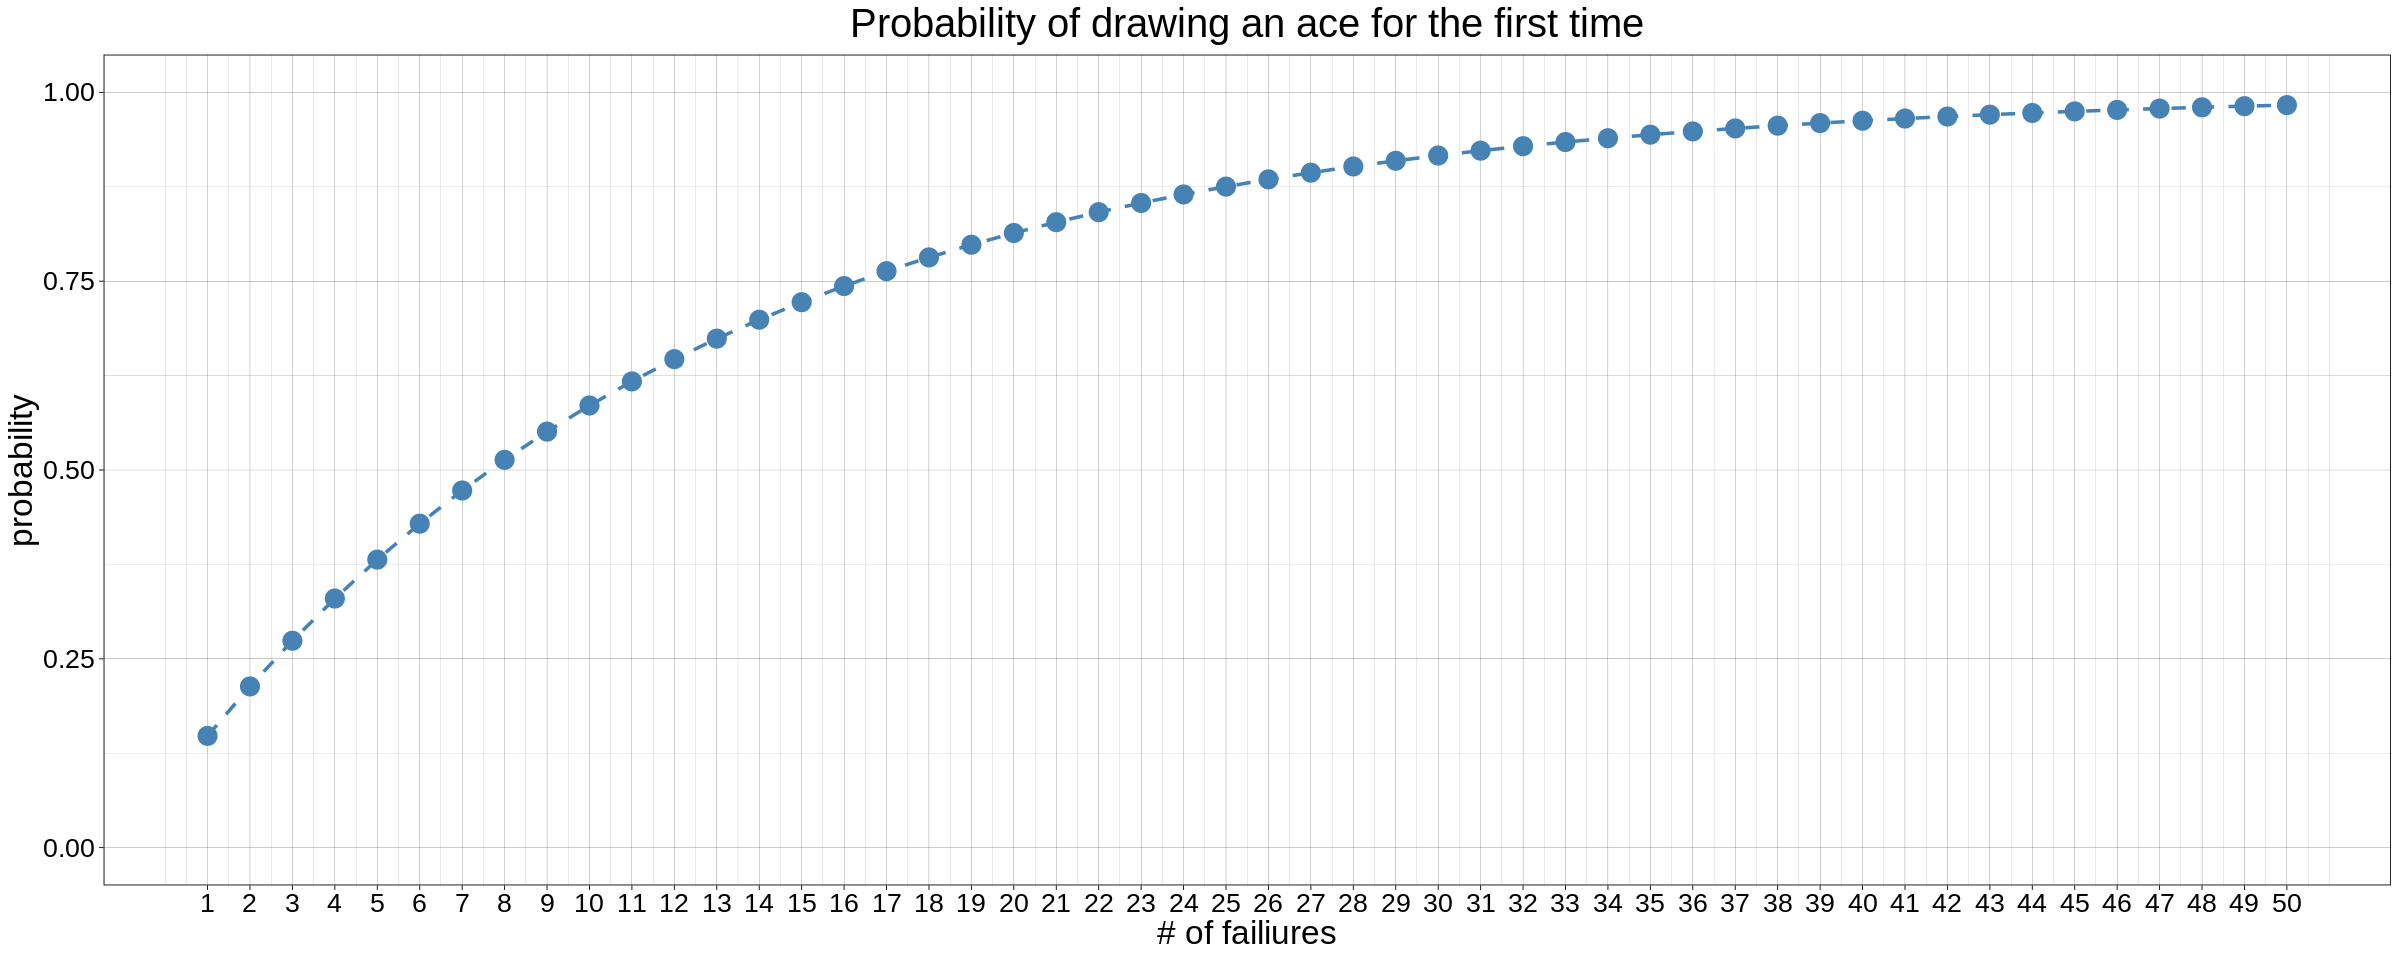

In [68]:
x = 1:50
k = 1
prob = 4/52
y_pdf = dnbinom(x, k, prob)
y_cdf = pnbinom(x, k, prob)

options(repr.plot.width=20, repr.plot.height=8)                                   
p <- ggplot() +   
     theme_linedraw() +                                            
     geom_line(aes(x=x, y=y_cdf), color="steelblue", lwd = 1, linetype="dashed") + 
     geom_point(aes(x=x, y=y_cdf), color="steelblue", size = 5) +                                                             
     theme(text = element_text(size=20)) +
     ggtitle("Probability of drawing an ace for the first time") +
     theme(plot.title = element_text(hjust = 0.5))  +
     ylim(0,1) +
     ylab("probability") +
     xlab("# of failiures") + 
     scale_x_continuous(breaks=x, labels=x) 

p

The request probability is equal to $1-\sum^9 _{n_\text{draws}=1} \text{nbinom}(n_\text{draws}, n_\text{success}=1, p_\text{success}=4/52)$ BUT R is funny, and actually dnbinom is implemented as $\text{nbinom}(n_\text{failiures} \text{ before the }r^{th}\text{ success} ,  n_\text{success}=1, p_\text{success}=4/52)$ so we must act with special attention

In [4]:
p = 1-pnbinom(8, k, prob) # at least 9 failures are needed
cat("The probability that at least 10 draws are needed to until one ace is drawn is", round(p, 4)*100, "%")

The probability that at least 10 draws are needed to until one ace is drawn is 48.66 %

Moreover, in this case the appropriate distribution to use should be the geometric distribution, anyway the result is the same as one would expect comparing the two pdfs in the case of $n_\text{success}=1$ for the _Bneg_.

In [5]:
p = 1-pgeom(8, prob) # at least 9 failures are needed
cat("The probability that at least 10 draws are needed to until one ace is drawn is", round(p, 4)*100, "%")

The probability that at least 10 draws are needed to until one ace is drawn is 48.66 %

## Exercise 5

The time it takes a student to complete a TOLC-I University orientation and evaluation test follows a density function of the form:
$$
f(X)=
\begin{cases}
c(t-1)(2-t) & 1<t<2\\
0 & \text{otherwise}
\end{cases}
$$
where t is the time in hours.

a) using the integrate() R function, determine the constant c (and verify it analytically)

b) write the set of four R functions and plot the pdf and cdf, respectively

c) evaluate the probability that the student will finish the aptitude test in more than
75 minutes. And that it will take 90 and 120 minutes.


In [6]:
# determine the constant c
f = function(t){ return(ifelse(t < 2 & t > 1, (t-1)*(2-t), 0))}
c = 1/integrate(f, -Inf, Inf)$value

In [47]:
## write the set of four R functions and plot the pdf and cdf, respectively

# pdf
f_pdf     = function(t){ return(ifelse(t < 2 & t > 1, c*(t-1)*(2-t), 0))}

# cdf
f_cdf     = function(p){ return(ifelse(p < 2 & p > 1, -c*(p^3/3-3*p^2/2+2*p)+5, ifelse(p>=2, 1, 0)))}

# quantile
f_quant   = function(q){ return(ifelse(q <= 1 & q >= 0, uniroot(function(x){ return (f_cdf(x)-q)}, lower=1, upper=2)$root, "invalid input, t must be between 0 and 1"))}

# random sampling
f_rs      = function(n){ return(to_vec(for(q in runif(n)) f_q(q)))}

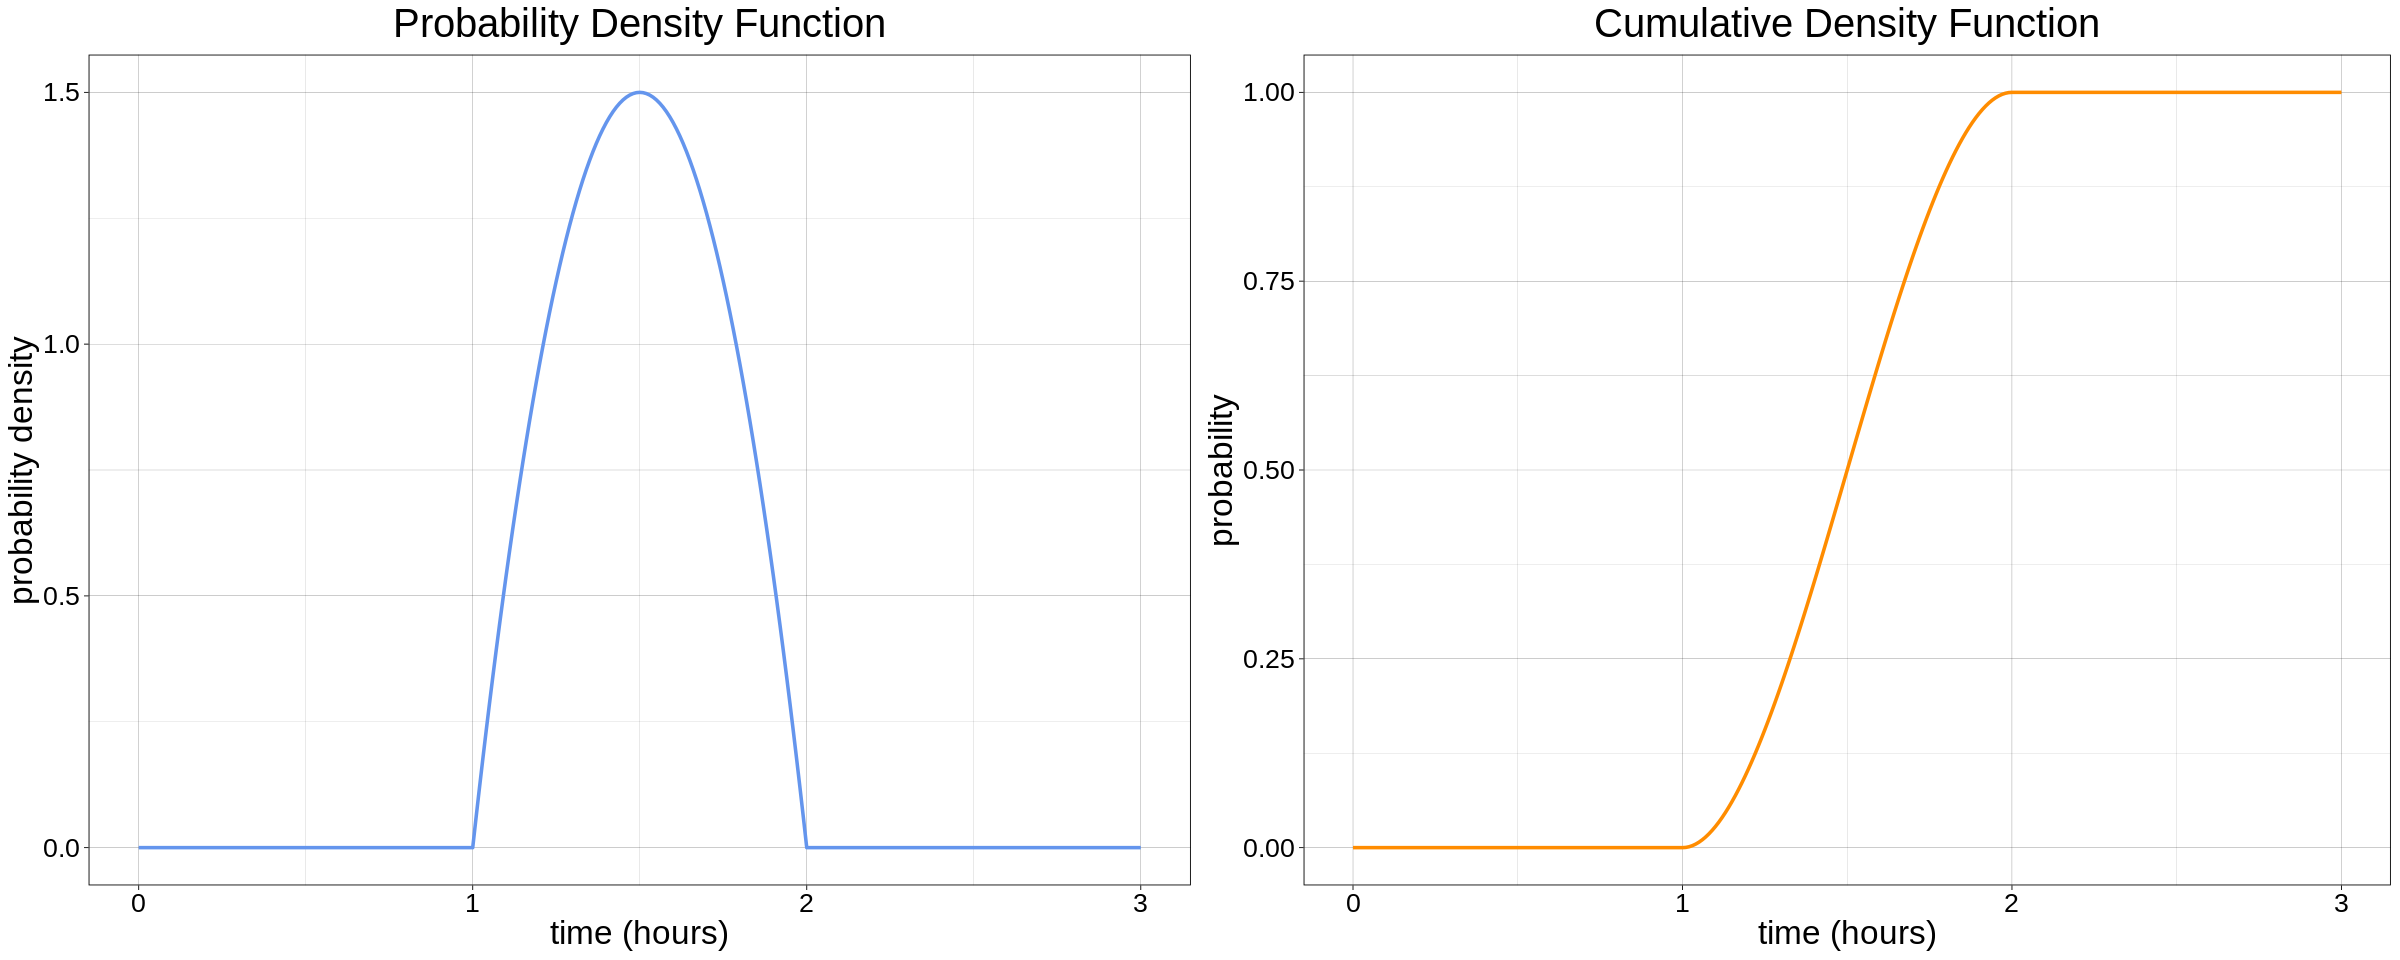

In [66]:
# plot the pdf and cdf
x     = seq(0,3,0.01)
y_pdf = f_pdf(x)
y_cdf = f_cdf(x)

options(repr.plot.width=20, repr.plot.height=8)                                   
pdf <- ggplot() +   
     theme_linedraw() +                                            
     geom_line(aes(x=x, y=y_pdf), color="cornflowerblue",  lwd = 1) +                                                             
     theme(text = element_text(size=20)) +
     ggtitle("Probability Density Function") +
     theme(plot.title = element_text(hjust = 0.5))  +
     ylab("probability density") +
     xlab("time (hours)") 

cdf <- ggplot() +   
     theme_linedraw() +                                            
     geom_line(aes(x=x, y=y_cdf), color="dark orange", lwd = 1) +                                                               
     theme(text = element_text(size=20)) +
     ggtitle("Cumulative Density Function") +
     theme(plot.title = element_text(hjust = 0.5))  +
     ylab("probability") +
     ylim(0,1) +
     xlab("time (hours)")

grid.arrange(pdf, cdf, nrow=1)

In [55]:
# evaluate the probability that the student will finish the aptitude test in more than 75 minutes -> 1.25h
p = 1-f_cdf(1.25)
cat("The probability that the student will finish the aptitude test in more than 75 minutes is:   ", round(p, 4)*100, "%\n")

# evaluate the probability that the student will finish the aptitude test between minute 90 and 120
p = 1-f_cdf(1.5)
cat("The probability that the student will finish the aptitude test between minute 90 and 120 is: ", round(p, 4)*100, "%")

The probability that the student will finish the aptitude test in more than 75 minutes is:    84.38 %
The probability that the student will finish the aptitude test between minute 90 and 120 is:  50 %

## Exercise 6
The lifetime of tires sold by an used tires shop is 10^4· x km, where x is a random variable following the distribution function:
$$
f(X)=
\begin{cases}
2/x^2 & 1<x<2\\
0 & \text{otherwise}
\end{cases}
$$

a) write the set of four R functions and plot the pdf and cdf, respectively

b) determine the probability that tires will last less than 15000 km

c) sample 3000 random variables from the distribution and determine the mean value and the variance, using the expression $Var(X) = E[X^2] − E[X]^2$

In [79]:
## write the set of four R functions and plot the pdf and cdf, respectively

# pdf
f_pdf     = function(t){ return(ifelse(t < 2 & t > 1, 2/t^2, 0))}

# cdf
f_cdf     = function(p){ return(ifelse(p < 2 & p > 1, -2/p+2, ifelse(p>=2, 1, 0)))}

# quantile
f_quant   = function(q){ return(ifelse(q <= 1 & q >= 0, uniroot(function(x){ return (f_cdf(x)-q)}, lower=1, upper=2)$root, "invalid input, t must be between 0 and 1"))}

# random sampling
f_rs      = function(n){ return(to_vec(for(q in runif(n)) f_q(q)))}

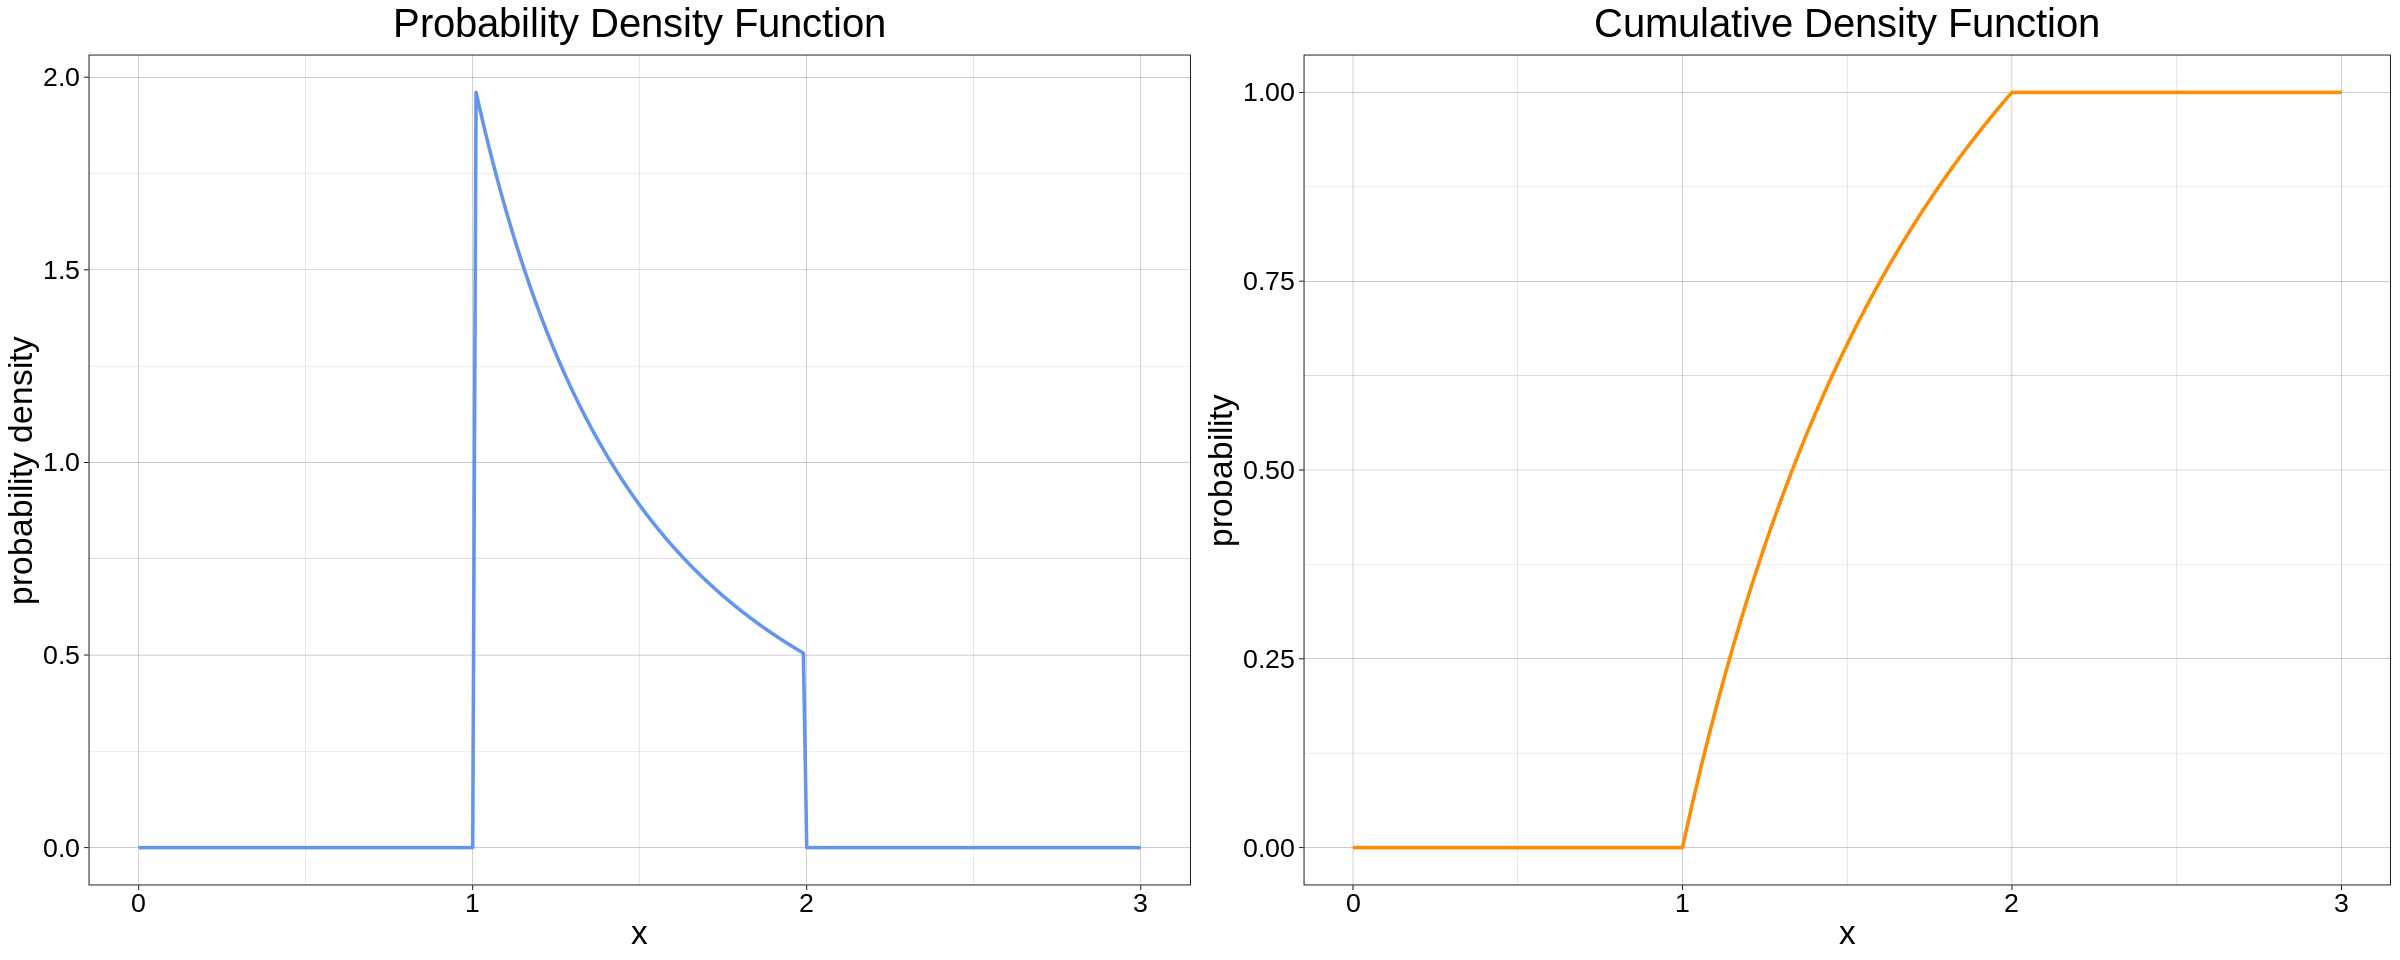

In [80]:
# plot the pdf and cdf
x     = seq(0,3,0.01)
y_pdf = f_pdf(x)
y_cdf = f_cdf(x)

options(repr.plot.width=20, repr.plot.height=8)                                   
pdf <- ggplot() +   
     theme_linedraw() +                                            
     geom_line(aes(x=x, y=y_pdf), color="cornflowerblue",  lwd = 1) +                                                             
     theme(text = element_text(size=20)) +
     ggtitle("Probability Density Function") +
     theme(plot.title = element_text(hjust = 0.5))  +
     ylab("probability density") +
     xlab("x") 

cdf <- ggplot() +   
     theme_linedraw() +                                            
     geom_line(aes(x=x, y=y_cdf), color="dark orange", lwd = 1) +                                                               
     theme(text = element_text(size=20)) +
     ggtitle("Cumulative Density Function") +
     theme(plot.title = element_text(hjust = 0.5))  +
     ylab("probability") +
     ylim(0,1) +
     xlab("x")

grid.arrange(pdf, cdf, nrow=1)

In [81]:
# determine the probability that tires will last less than 15000 km -> x<1.5
p = f_cdf(1.5)
cat("The probability that that tires will last less than 15000 km  is: ", round(p, 4)*100, "%")

The probability that that tires will last less than 15000 km  is:  66.67 %

In [83]:
# sample 3000 random variables from the distribution and determine the mean value and the variance
N = 3000
x = f_rs(N)

E   = sum(x)/N
Var = sum(x^2)/N-E^2

In [92]:
cat("X distribution\n")
cat("Mean value: ", round(E, 3), "\n")
cat("Variance  : ", round(Var, 3), "\n\n")
cat("Tire lifetime distribution\n")
cat("Mean value: ", round(E, 3)*10^4, "km\n")
cat("Variance  : ", round(Var, 3)*10^4, "km\n")

X distribution
Mean value:  1.383 
Variance  :  0.076 

Tire lifetime distribution
Mean value:  13830 km
Variance  :  760 km


## Additional - Exercise given in class

A company produces screws, the probability of a screw to be defective is p = 0.015, a box with n = 100 screws is packaged. Compute:

a) the probability that all screws are non defective

b) the defective screws distribution comparing the Binomial and Poisson distributions

c) how many extra screws should the box contain in order to have n = 100 non
defective screws with probability greater than 80%


In [98]:
prob = pbinom(0, 100, 0.015)
cat("The probability that all screws are non defective is ", round(prob, 4)*100, "%")

The probability that all screws are non defective is  22.06 %

In [93]:
N         = 10
x         = 0:N
binom_pdf = dbinom(x, 100, 0.015)
pois_pdf  = dpois(x, 100*0.015)

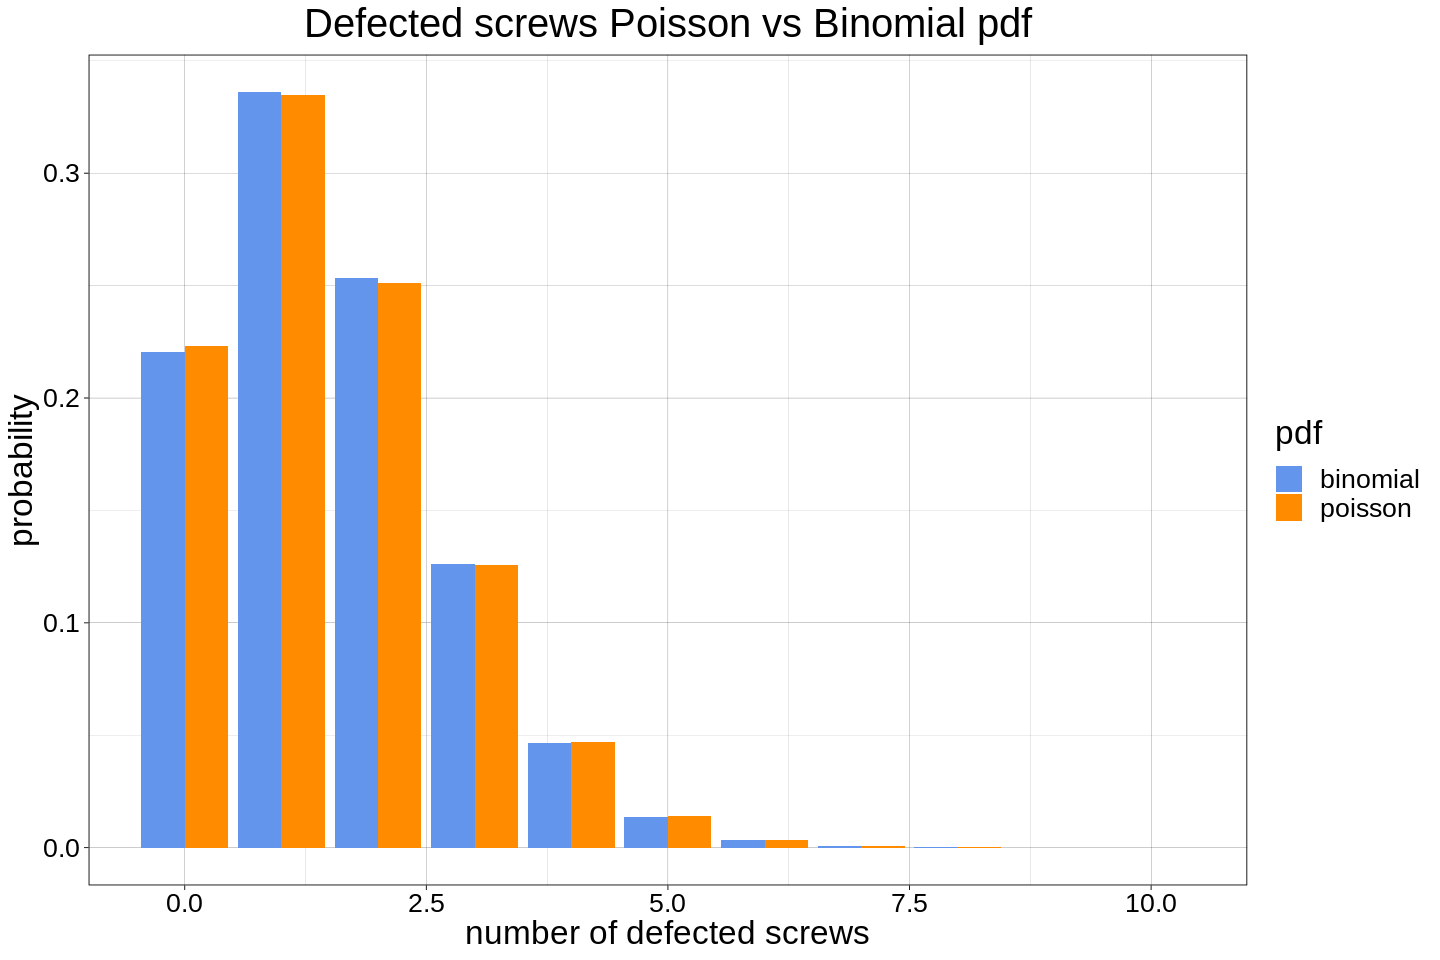

In [95]:
x_          = rep(x, 2)
probability = c(binom_pdf, pois_pdf)
pdf         = c(rep("binomial", N+1), rep("poisson", N+1))

data <- data.frame(x_, probability, pdf)

options(repr.plot.width=12, repr.plot.height=8) 
p <-ggplot(data, aes(fill=pdf, y=probability, x=x_)) + 
    geom_bar(position="dodge", stat="identity") +
    theme_linedraw() +  
    ggtitle("Defected screws Poisson vs Binomial pdf") +
    theme(plot.title = element_text(hjust = 0.5))  +
    theme(text = element_text(size=20)) +
    xlab("number of defected screws") +
    scale_fill_manual(values = c("cornflowerblue", "dark orange"))
p

In [96]:
prob = 0.015
k = 100

costumed_bin_pdf = function(N, prob, k){ return(choose(N-1, k-1)*prob^(N-k)*(1-prob)^k)}

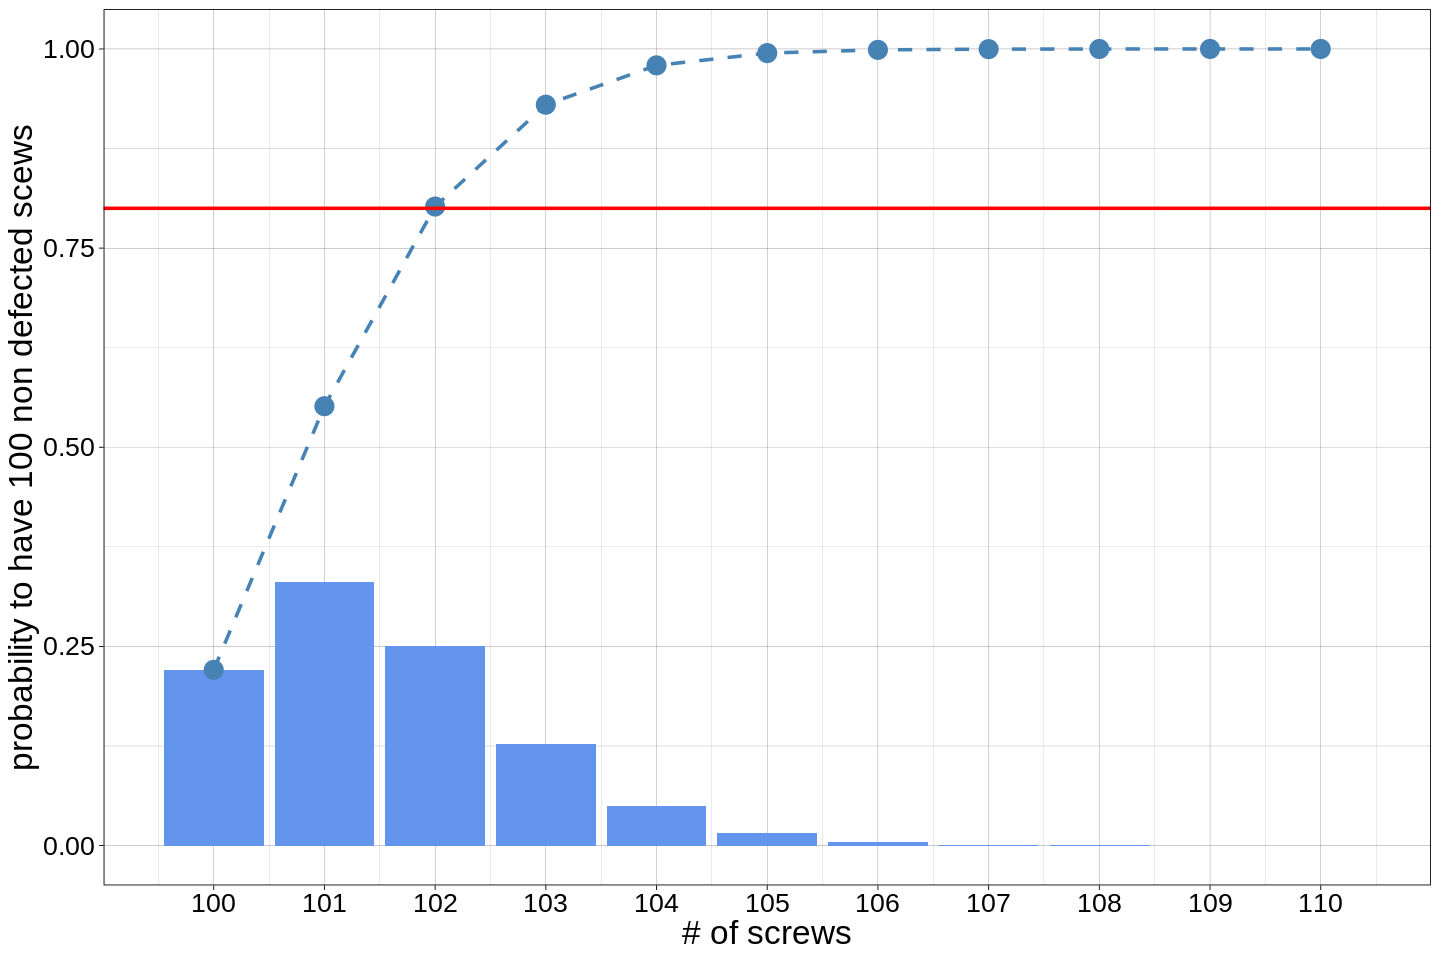

In [97]:
x = 100:110
y_pdf = to_vec(for(x_i in x) costumed_bin_pdf(x_i, prob, k))
sum = 0
y_cdf = to_vec(for(sum_i in y_pdf) sum = sum + sum_i)

options(repr.plot.width=12, repr.plot.height=8)                                   
p <- ggplot() +   
     theme_linedraw() +                                            
     geom_bar(aes(x=x, y=y_pdf), fill="cornflowerblue", stat="identity") + 
     geom_line(aes(x=x, y=y_cdf), color="steelblue", lwd = 1, linetype="dashed") + 
     geom_point(aes(x=x, y=y_cdf), color="steelblue", size = 5) +                                                             
     theme(text = element_text(size=20)) +
     #ggtitle("") +
     theme(plot.title = element_text(hjust = 0.5))  +
     #ylim(0,1) +
     ylab("probability to have 100 non defected scews") +
     xlab("# of screws") + 
     scale_x_continuous(breaks=x, labels=x) +
     geom_hline(yintercept=0.8, color ="red", lwd=1)

p

So the minimal number of screw that the box should contain in order to have N=100 non detective screws with probability greater than 80% is 102